In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data to Python environment

In [3]:
adv_data = pd.read_csv('Add_sales_data_2018.csv')

In [4]:
adv_data.head(5)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
adv_data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [6]:
# checking null values 
adv_data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# 1. Checking whether there is any relationship between the amount spent for advertising through five different companies and profit generated

In [7]:
corr_matrix = adv_data.corr()
corr_matrix

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


In [8]:
# We can also plot a graph, Heatmap to get information about the correlation.

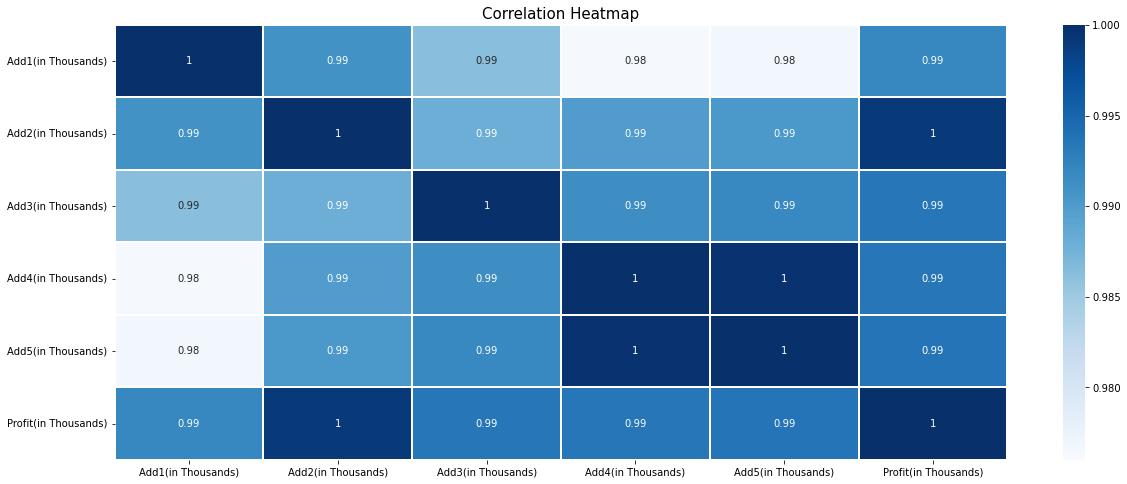

In [9]:
plt.subplots(figsize=(20,8))
sns.heatmap(data =corr_matrix , vmin = .976, vmax = 1, annot = True, linewidth = .2, cmap='Blues')
plt.title('Correlation Heatmap',fontsize =15)
plt.show()

When observing the table or graph we can find that all variables (Add1,...,Add5 and Profit), are highly correlated. All values are near to 1 which indicate a high correlation or relation among them.

So we can say that there is a strong relationship between the amount spent for advertising through five different companies and profit generated.

# 2. Building a regression model to predict the profit from the given data and comment your findings on it

In [10]:
adv_data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [11]:
ref_data = adv_data.select_dtypes(include=['float64'])
ref_data.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


In [12]:
# Define dependent(y) and independent(X) variables 

In [13]:
y = ref_data['Profit(in Thousands)']
X= ref_data.drop(['Profit(in Thousands)'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = .25)

In [26]:
from sklearn import linear_model
lr = linear_model.LinearRegression() 
model = lr.fit(X_train,y_train) 
predictions = model.predict(X_test) 

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('R-Squard score for this model is;', r2)

R-Squard score for this model is; 1.0


In [19]:
# Now we find the Mean Squared Error(MSE), another metrics to check our Regression model

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
print('The MSE is:',mse)

The MSE is: 4.613122646930347e-25


since MSE is a lesser value, our Regression model is the best fit.

In [29]:
# Intercept and Slope coefficients of regression liine
print('y-intercept:',model.intercept_)
print('Slope coefficients:', model.coef_)

y-intercept: -1.8189894035458565e-12
Slope coefficients: [ 1.   12.38  3.5   1.    0.9 ]


R-squared and Mean Squared Error for our model is very good.So the predictions will be accurate.
From the Regression line we can find Add2 is the biggest contributor for generating profit. Ex: If we give value 1 to Add2 and 0 to Add1,Add3,Add4 & Add5, it gives a profit of 12.38. And we consider the same for other then the profit is 1.,3.5,1.0 and 0.9 respectively.
Even when we add others still it not reaches the profit generated by Add2.
Hence, the organization can spend more on Add2 company and even remove rest of the add companies because the profit generated by Add2 is almost doble when compared to other 4.

# 3. Predicting the profit generated by the company, if they wish to spend the following amount for advertisement.

    Add1(in Thousands): 290
    Add2(in Thousands): 312
    Add3(in Thousands): 309
    Add4(in Thousands): 298
    Add5(in Thousands): 320

In [23]:
#We can calculate the profit by simply giving the values to the regression line equation;

Equation; Profit = 0 + [1.0 (Add1)] + [12.38 (Add2)] + [3.5 (Add3)] + [1.0 (Add4)] + [0.9 * (Add5)]

In [24]:
profit = (1.*290)  + (12.38*312) + (3.5*309) +  (1. *298)+   (0.9*320)
print('The estimated Profit generated by the company:',profit,"(in Thousands)")

The estimated Profit generated by the company: 5820.06 (in Thousands)


In [25]:
#using predict() function, this function enables us to predict the new Target values(Profit) on the basis of the trained model.

values = [[290, 312,309,298,320]]
columns = ['Add1(in Thousands)', 'Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']

new_X = pd.DataFrame(values,columns = columns)
new_y = model.predict(new_X)
print('The estimated Profit generated by the company:',"%.2f"% new_y[0],"(in Thousands)")

The estimated Profit generated by the company: 5820.06 (in Thousands)
